In [1]:
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('time_course_results.csv')

df.head()

,seed,base,count,corr,queue
0,1691,1.851882e+06,825340.975998,816013.784845,7.702969e+05
1,1623,2.075115e+06,815010.727197,786182.075563,1.215736e+06
2,1367,1.505252e+06,690464.757221,630086.528577,5.904119e+05
3,1746,7.080163e+05,287846.008286,328126.139282,7.080415e+05
4,299,1.552671e+06,789296.687638,708789.054566,5.994691e+05


In [3]:
area = []
colors = []
x = []
y = []
label = []

labels = ['baseline', 'count', 'corr', 'queue']

values = df.sample(10).values
for i in range(values.shape[0]):
    for j in range(1, values.shape[1]):
        colors.append(j % 5 / 5)
        x.append(i)
        y.append(values[i][j] / 20000)
        area.append(np.log(values[i][0]) * 25)
        label.append(labels[j % 5 - 1])

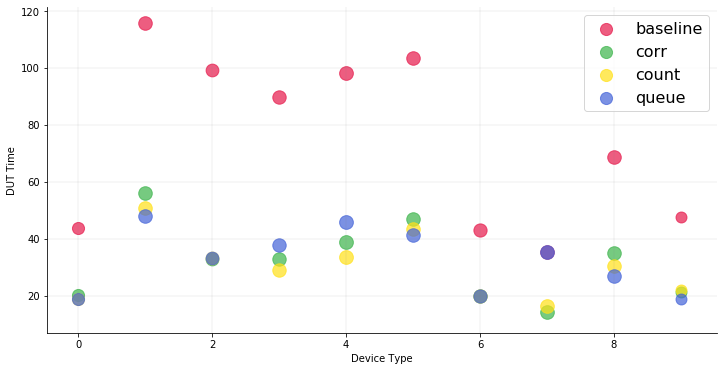

In [4]:
params = {'legend.fontsize': 16,
          'legend.handlelength': 2}
plt.rcParams.update(params)

#loading dataset
def scatterplot(df, x, y, categories, area):
    fig, ax = plt.subplots(figsize=(12, 6))
    #assigns a color to each data point
    colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8']
    #iterates through the dataset plotting each data point and assigning it its corresponding color and label
    for i in range(len(x)):
        ax.scatter(x[i], y[i], alpha=0.70, color = colors[i%len(colors)], label=categories[i], s=area[i])
    #adds title and axes labels
    ax.set_xlabel('Device Type')
    ax.set_ylabel('DUT Time')
    #removing top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #adds major gridlines
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    #adds legend
    ax.legend(np.unique(categories))
    
    plt.savefig('vis.png')
    
    plt.show()
scatterplot(df, x, y, label, area)